In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Phishing_Email.csv')

In [8]:
print(df.columns)


Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')


In [9]:
blanks = []

for i, row in df.iterrows():
    if row["Email Text"].isspace():
        blanks.append(i)

print(len(blanks), "   |    ", 'blanks: ', blanks)

df.drop(blanks, inplace=True)



3    |     blanks:  [9605, 13593, 16281]


In [10]:
# Import the 'stopwords' corpus from the nltk library
# Stop words are commonly used words that are often removed from text during processing to enhance algorithm performance
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Import the 'WordNetLemmatizer' from the nltk library
# Lemmatization is the process of reducing a word to its base or root form (lemma)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Get the list of English stop words
sw = stopwords.words('english')

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [11]:
# Define a function to preprocess text
def preprocess_text(messy_string):
    # Assert that the input is a string
    assert(type(messy_string) == str)

    # Split the string into words, lemmatize each word, remove stop words, and join the words back into a string
    # 'lemmatizer.lemmatize(word)' reduces the word to its base or root form (lemma)
    # 'word not in sw' filters out stop words
    cleaned = ' '.join([lemmatizer.lemmatize(word) for word in messy_string.split() if word not in sw])

    # Return the cleaned string
    return cleaned

In [13]:
df['email'] = df['Email Text'].apply(preprocess_text)

In [14]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Define the pipeline with a more descriptive name
text_processing_pipeline = Pipeline([
    ('Vectorize', CountVectorizer()),
    ('TF-IDF', TfidfTransformer())
])

In [15]:
text_processing_pipeline

Pipeline(steps=[('Vectorize', CountVectorizer()),
                ('TF-IDF', TfidfTransformer())])

In [17]:
# Import 'train_test_split' from sklearn's model_selection module
# This is used to split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# Split 'df["email"]' and 'df["label"]' into training and testing sets
# 'test_size=0.2' means that 20% of the data will be used for testing, and the rest for training
# 'random_state=42' sets the seed for the random number generator used for the split
X_train, X_test, y_train, y_test = train_test_split(df["email"], df["Email Type"], test_size=0.2, random_state=42)

In [18]:
# Fit the text processing pipeline to the training data and transform the training data
# 'fit_transform()' learns the parameters from the data and then transforms the data according to these parameters
X_train = text_processing_pipeline.fit_transform(X_train)

# Transform the testing data using the already fitted pipeline
# 'transform()' uses the parameters learned from 'fit_transform()' to transform the data
X_test = text_processing_pipeline.transform(X_test)

In [19]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , confusion_matrix

Classification report for SVC: 
                precision    recall  f1-score   support

Phishing Email       0.95      0.99      0.97      1477
    Safe Email       0.99      0.97      0.98      2250

      accuracy                           0.98      3727
     macro avg       0.97      0.98      0.98      3727
  weighted avg       0.98      0.98      0.98      3727



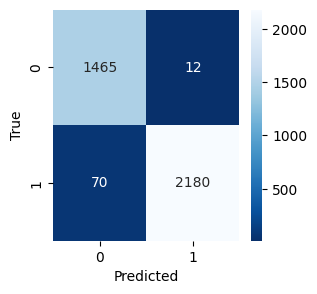

--------------------------------------------
Classification report for RandomForest: 
                precision    recall  f1-score   support

Phishing Email       0.95      0.98      0.96      1477
    Safe Email       0.99      0.97      0.98      2250

      accuracy                           0.97      3727
     macro avg       0.97      0.97      0.97      3727
  weighted avg       0.97      0.97      0.97      3727



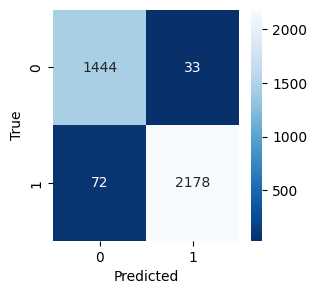

--------------------------------------------
Classification report for LogisticRegression: 
                precision    recall  f1-score   support

Phishing Email       0.95      0.98      0.96      1477
    Safe Email       0.99      0.96      0.98      2250

      accuracy                           0.97      3727
     macro avg       0.97      0.97      0.97      3727
  weighted avg       0.97      0.97      0.97      3727



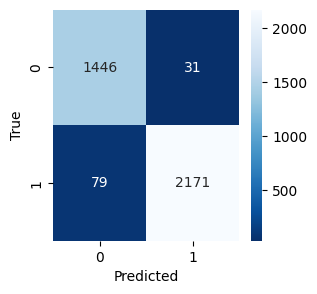

--------------------------------------------
Classification report for MultinomialNB: 
                precision    recall  f1-score   support

Phishing Email       0.97      0.84      0.90      1477
    Safe Email       0.90      0.98      0.94      2250

      accuracy                           0.92      3727
     macro avg       0.93      0.91      0.92      3727
  weighted avg       0.93      0.92      0.92      3727



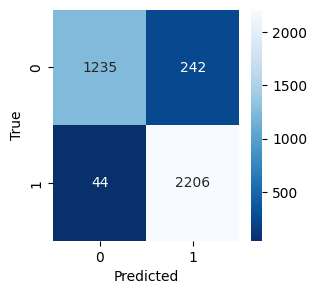

--------------------------------------------


In [20]:
# Define a dictionary of classifiers for easier referencing and potential scalability
classifiers = {
    "SVC": SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "MultinomialNB": MultinomialNB()
}

# Iterate over each classifier and print report
for classifier_name, classifier_obj in classifiers.items():
    # Fit the model
    classifier_obj.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier_obj.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Print the classification report
    print(f'Classification report for {classifier_name}: ')
    print(report)
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix using matplotlib and seaborn
    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'Blues_r')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("--------------------------------------------")

In [21]:
df.iloc[2600]

,2605
Unnamed: 0,2605
Email Text,afar i have a student ( lee fulmer ) working o...
Email Type,Safe Email
email,afar student ( lee fulmer ) working morphology...


In [22]:
# Test the model with a custom email

#custom_email = "Hi there, How are you doing?"
custom_email = df.iloc[2600]['email']


custom_email = text_processing_pipeline.transform([preprocess_text(custom_email)])

print(classifiers["SVC"].predict(custom_email))

['Safe Email']
